In [ ]:
from fastai.vision.all import *
from fastcore.test import *
from fastbook import plot_function

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Binary-Image-Classifier-From-Scratch" data-toc-modified-id="Binary-Image-Classifier-From-Scratch-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Binary Image Classifier From Scratch</a></span><ul class="toc-item"><li><span><a href="#Explore-data" data-toc-modified-id="Explore-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Explore data</a></span></li><li><span><a href="#Idea:-distance-from-average-pixel-values" data-toc-modified-id="Idea:-distance-from-average-pixel-values-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Idea: distance from average pixel values</a></span></li><li><span><a href="#Tensor-practice" data-toc-modified-id="Tensor-practice-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Tensor practice</a></span></li><li><span><a href="#How-good-is-L1-dist-model?" data-toc-modified-id="How-good-is-L1-dist-model?-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>How good is L1 dist model?</a></span></li></ul></li><li><span><a href="#Gradient-Descent" data-toc-modified-id="Gradient-Descent-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Gradient Descent</a></span><ul class="toc-item"><li><span><a href="#Making-steps" data-toc-modified-id="Making-steps-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Making steps</a></span></li></ul></li><li><span><a href="#MNIST-Loss-Function" data-toc-modified-id="MNIST-Loss-Function-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>MNIST Loss Function</a></span><ul class="toc-item"><li><span><a href="#Jumpstart" data-toc-modified-id="Jumpstart-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Jumpstart</a></span></li><li><span><a href="#Moving-on" data-toc-modified-id="Moving-on-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Moving on</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-need-a-better-loss-fxn-s.t.-small-changes-in-params-result-in-small-changes-in-loss" data-toc-modified-id="We-need-a-better-loss-fxn-s.t.-small-changes-in-params-result-in-small-changes-in-loss-3.2.0.1"><span class="toc-item-num">3.2.0.1&nbsp;&nbsp;</span>We need a better loss fxn s.t. small changes in params result in small changes in loss</a></span></li><li><span><a href="#Bounding-and-transforming-activations-with-our-good-friend-Sigmoid" data-toc-modified-id="Bounding-and-transforming-activations-with-our-good-friend-Sigmoid-3.2.0.2"><span class="toc-item-num">3.2.0.2&nbsp;&nbsp;</span>Bounding and transforming activations with our good friend Sigmoid</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Putting-it-all-together" data-toc-modified-id="Putting-it-all-together-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Putting it all together</a></span><ul class="toc-item"><li><span><a href="#Jumpstart" data-toc-modified-id="Jumpstart-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Jumpstart</a></span></li><li><span><a href="#Train-SGD" data-toc-modified-id="Train-SGD-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Train SGD</a></span></li></ul></li><li><span><a href="#Some-Refactoring-with-PyTorch" data-toc-modified-id="Some-Refactoring-with-PyTorch-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Some Refactoring with PyTorch</a></span></li><li><span><a href="#Adding-a-non-linearity;-my-first-NN" data-toc-modified-id="Adding-a-non-linearity;-my-first-NN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Adding a non-linearity; my first NN</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#How-Jeremy-looks-inside-his-models:" data-toc-modified-id="How-Jeremy-looks-inside-his-models:-6.0.1"><span class="toc-item-num">6.0.1&nbsp;&nbsp;</span>How Jeremy looks inside his models:</a></span></li></ul></li></ul></li><li><span><a href="#Clean-version-of-my-work" data-toc-modified-id="Clean-version-of-my-work-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Clean version of my work</a></span><ul class="toc-item"><li><span><a href="#SGD-by-hand" data-toc-modified-id="SGD-by-hand-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>SGD by hand</a></span></li><li><span><a href="#SGD-with-fastai.Learner" data-toc-modified-id="SGD-with-fastai.Learner-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>SGD with fastai.Learner</a></span><ul class="toc-item"><li><span><a href="#How-Jeremy-looks-inside-his-models:" data-toc-modified-id="How-Jeremy-looks-inside-his-models:-7.2.1"><span class="toc-item-num">7.2.1&nbsp;&nbsp;</span>How Jeremy looks inside his models:</a></span></li></ul></li></ul></li><li><span><a href="#Everything-in-three-lines-and-one-epoch" data-toc-modified-id="Everything-in-three-lines-and-one-epoch-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Everything in three lines and one epoch</a></span></li><li><span><a href="#Next:-improvements" data-toc-modified-id="Next:-improvements-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Next: improvements</a></span></li></ul></div>

# Binary Image Classifier From Scratch

## Explore data

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE)
Path.BASE_PATH = path
path.ls()

(#3) [Path('valid'),Path('labels.csv'),Path('train')]

In [ ]:
(path/'train').ls()

(#2) [Path('train/7'),Path('train/3')]

In [ ]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
sevens

(#6265) [Path('train/7/10002.png'),Path('train/7/1001.png'),Path('train/7/10014.png'),Path('train/7/10019.png'),Path('train/7/10039.png'),Path('train/7/10046.png'),Path('train/7/10050.png'),Path('train/7/10063.png'),Path('train/7/10077.png'),Path('train/7/10086.png')...]

In [ ]:
im7path = sevens[0]
im7 = Image.open(im7path)
im7

In [ ]:
(path/'train').ls()

threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
sevens

(#6265) [Path('train/7/10002.png'),Path('train/7/1001.png'),Path('train/7/10014.png'),Path('train/7/10019.png'),Path('train/7/10039.png'),Path('train/7/10046.png'),Path('train/7/10050.png'),Path('train/7/10063.png'),Path('train/7/10077.png'),Path('train/7/10086.png')...]

In [ ]:
im7path = sevens[0]
im7 = Image.open(im7path)
im7

In [ ]:
tensor(im7)

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [ ]:
im7t = tensor(im7)
# Throw into pandas to visualize it using background gradient
df = pd.DataFrame(im7t)
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,21,51,213,254,252,252,252,254,252,252,252,254,252,252,252,255,252,100,0,0,0,0,0,0
8,0,0,0,21,161,250,250,252,250,250,250,252,250,250,250,252,250,250,250,252,250,100,0,0,0,0,0,0
9,0,0,0,51,250,250,250,252,189,190,250,252,250,250,250,252,250,250,250,252,189,40,0,0,0,0,0,0


## Idea: distance from average pixel values

- Find average activations for each pixel for all threes, sevens
- Classify based on least distance (L1) from avg 3, 7
- ∴ output is 2 activations: L1 distance from avg3, avg7

Lists of image tensors

In [ ]:
tens3 = [tensor(Image.open(o)) for o in threes]
tens7 = [tensor(Image.open(o)) for o in sevens]
# len(three_ts), len(seven_ts)

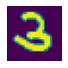

In [ ]:
show_image(tens3[5])

In [ ]:
type(tens3[0])

torch.Tensor

Stack lists into tensors. Floats in computer vision expected between 0. and 1.

In [ ]:
stk3 = torch.stack(tens3).float()/255
stk7 = torch.stack(tens7).float()/255
stk7.shape

torch.Size([6265, 28, 28])

Output above has 3 axes, ∴ stk7 is a rank 3 tensor. 3 axes == 3 dimensions.

In [ ]:
stk7.ndim

3

In [ ]:
stk7.mean()

tensor(0.1145)

The avg we want isn't the avg over all cells, it's the avg over the img dimension. We can pass the idx of the dim to tensor.mean() to do that.

In [ ]:
stk7.mean() # wrong

tensor(0.1145)

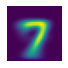

In [ ]:
av7 = stk7.mean(0) # correct!
show_image(av7)

In [ ]:
av7rows = stk7.mean(1) # wrong
show_image(av7rows)

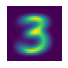

In [ ]:
av3 = stk3.mean(0)
show_image(av3)

Take pixel diff of L1(av7, some7) and L1(av3, some3) and choose the lower value.
- Convert pixel values to range [0,1]
- Take L1 for every pixel
- Sum it up
- Output min

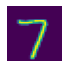

In [ ]:
ex7 = stk7[42]
show_image(ex7)

Take diffs:

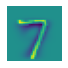

In [ ]:
diff7 = ex7-av7
show_image(diff7)

Convert to abs:

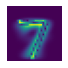

In [ ]:
diff7abs = diff7.abs()
show_image(diff7abs.abs())

Sum up L1s:

In [ ]:
diff7abs.sum()

tensor(71.7717)

Add diff against av3:

In [ ]:
diff3 = ex7c-av3
show_image(diff3)

NameError: name 'ex7c' is not defined

Clean up/refactor:

In [ ]:
a3 = stk3[1]
a3_L1_3 = (a3-av3).abs().mean()
a3_L1_7 = (a3-av7).abs().mean()
a3_L1_3, a3_L1_7

Using torch loss fxns:

In [ ]:
F.l1_loss(a3,av3), F.l1_loss(a3,av7)

## Tensor practice

In [ ]:
stk3[0]

In [ ]:
stk3[0,0]

In [ ]:
stk3[0,0:3]

## How good is L1 dist model?

In [ ]:
train3,train7 = tens3,tens7

In [ ]:
valid3 = torch.stack(
    [tensor(Image.open(o)) for o in (path/'valid'/'3').ls()]
    ).float()/255
valid7 = torch.stack(
    [tensor(Image.open(o)) for o in (path/'valid'/'7').ls()]
    ).float()/255

valid3.shape,valid7.shape

In [ ]:
show_image(valid3[0])

In [ ]:
def mnist_dist(a,b): return (a-b).abs().mean((-1,-2)) # last and second-last dims
mnist_dist(a3,av3)

Broadcasting!!!

In [ ]:
valid3_dist = mnist_dist(valid3, av3)
valid3_dist

What is broadcasting? Notice that the following shapes don't match. PyTorch will "copy" the smaller shape 1010 times and subtract it from each of the 1010 stacks in valid3'd first axis. This is actually super high performance because it doesn't actually copy (no extra memory is allocated), and it's done on the GPU.

In [ ]:
valid3.shape

In [ ]:
av3.shape

These have the same shape, so this happens as expected:

In [ ]:
tensor([1,1,1]) + tensor([0,1,2])

In [ ]:
def is3(o): return mnist_dist(o,av3) < mnist_dist(o,av7)

In [ ]:
is3(stk3[0]), is3(stk7[0])

In [ ]:
is3(valid3)

In [ ]:
acc3 =     is3(valid3).float().mean()
acc7 =(1 - is3(valid7).float()).mean()

In [ ]:
acc3, acc7, (acc3 + acc7)/2

This model is 95% accurate.

# Gradient Descent

The avg L1 approach weighted every single px equally. This will give each px a unique weight, so that (for example) the pixels along the edge matter less than the pixels in the middle (or something like that).

In [ ]:
def f(x): return x**2

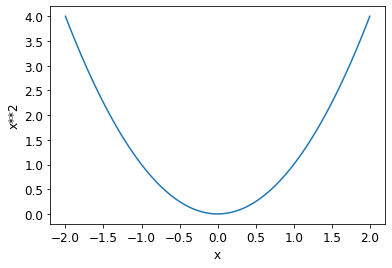

In [ ]:
plot_function(f, 'x', 'x**2')

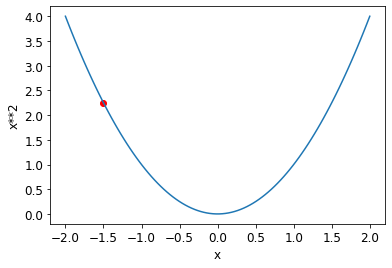

In [ ]:
plot_function(f, 'x', 'x**2')
x = -1.5
plt.scatter(x, f(x), color='red')

Steps for gradient descent:
1. Initialize parameters
2. Calc output
3. Calc loss
4. Calc gradient of loss (gradient is a matrix of partial derivatives)
5. Subtract gradient × step_size from params
6. First pass done; repeat # epochs-1 more times.

PyTorch derivs & grads w/ `requires_grad_()`

In [ ]:
x = tensor(3.).requires_grad_()

In [ ]:
y = f(x); y

In the above output, grad_fn knows that a power operation was taken.

Tell torch to take a deriv by using `.backward()`:

In [ ]:
y.backward()

In [ ]:
x.grad

Clean examples:

In [ ]:
x1,x2 = tensor(2.).requires_grad_(), tensor(3.).requires_grad_()

def f(x): return x**2

y = f(x1) + f(x2) # this built a graph behind the scenes.

y.backward() # this computes & stores derivatives for vars used in y.

x1.grad, x2.grad

In [ ]:
x1,x2 = tensor(2.).requires_grad_(), tensor(2.).requires_grad_()
def f1(x): return x**2
def f2(x): return x**3
y = f1(x1) + f2(x2)
y.backward()
x1.grad, x2.grad

Example with slightly bigger tensors:

Implicit .backward() call:

In [ ]:
x1 = tensor([1.,2.,3.]).requires_grad_()
x2 = tensor([2.,2.,2.]).requires_grad_()
def f1(x): return (x**2).sum() # sums() required b/c implicit call requires scalar y val
def f2(x): return (x**3).sum()
y = f1(x1) + f2(x2)
print(y) # y is scalar
y.backward() # no arg passed ("implicit")
x1.grad, x2.grad

Explicit .backward() call:

In [ ]:
x1 = tensor([1.,0.,0.]).requires_grad_()
x2 = tensor([1.,1.,1.]).requires_grad_()
def f(x): return x**2
def g(x): return 3*x

y = f(x1) + g(x2); print(y) # y isn't scalar
y.backward(x1)
print(x1.grad, x2.grad)   

In [ ]:
y = f(x1) + g(x2)
y.backward(x2)
print(x1.grad, x2.grad) 

Interesting:
- `y.bw(x1)` → `x1.grad = df(x1)` , `x2.grad = dg(x1)` 
- `y.bw(x2)` → `x1.grad = df(x2)` , `x2.grad = dg(x2)`

## Making steps

In [ ]:
t = torch.arange(0,20).float()
speed = torch.randn(20)*3 + 0.75*(t-9.5)**2 + 1
plt.scatter(t,speed)

In [ ]:
def f(t,params):
    a,b,c = params
    return a*t**2 + b*t + c

def L1(preds, targs): return (preds-targs).abs().mean()

p = torch.randn(3).requires_grad_()
p_init = p.clone()

yf = f(t,p)

def show_yf(yf, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(t, speed)
    ax.scatter(t, to_np(yf), color='red')
    ax.set_ylim(-100,100)
    
show_yf(yf)

In [ ]:
loss = L1(yf,speed)
loss.backward()

lr = 1e-3
p.data -= lr * p.grad.data # We must use p.data so we don't calculate p.grad here.
p.grad = None

yf = f(t,p)

show_yf(yf)

Wrap the above cell into a fxn:

In [ ]:
def do_step(p, prn=True):
    yf = f(t,p)
    loss = L1(yf,speed)
    loss.backward()
    p.data -= lr * p.grad.data
    p.grad = None
    if prn: print(loss.item())
    return yf

In [ ]:
for i in range(5): do_step(p)

In [ ]:
p = p_init.detach().requires_grad_()

In [ ]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_yf(do_step(p, True), ax)
plt.tight_layout()

In [ ]:
def show_n_steps(p,n=4,fsz=3,show_yf=show_yf,do_step=do_step):
    _,axs = plt.subplots(1,n,figsize=(n*fsz,fsz))
    for ax in axs: show_yf(do_step(p, True), ax)
    plt.tight_layout()

In [ ]:
p = torch.randn(3).requires_grad_()

In [ ]:
show_n_steps(p,10)

# MNIST Loss Function

We can't use predicted accuracy as the loss fxn because small changes to parameters may not affect predictions; ∴ grad would be zero. Althought accuracy will still be the most important metric to us for judging the model, in order to make grad descent work, we need a loss fxn that will change even if accuracy isn't changing.

To make this work, we can weight accuracy by loss.

## Jumpstart

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE)
Path.BASE_PATH = path


## Train
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
# sevens

im7path = sevens[0]
im7 = Image.open(im7path)
# im7

tens3 = [tensor(Image.open(o)) for o in threes]
tens7 = [tensor(Image.open(o)) for o in sevens]
# len(three_ts), len(seven_ts)

stk3 = torch.stack(tens3).float()/255
stk7 = torch.stack(tens7).float()/255
# stk7.shape

train3,train7 = stk3,stk7


## Valid
valid3 = torch.stack(
    [tensor(Image.open(o)) for o in (path/'valid'/'3').ls()]
    ).float()/255
valid7 = torch.stack(
    [tensor(Image.open(o)) for o in (path/'valid'/'7').ls()]
    ).float()/255

## Moving on

Reshape tensors as vectors using `.view()`:

In [ ]:
train_x = torch.cat([stk3,stk7]).view(-1, 28*28) # -1 here means "do it for every row" ...
train_x.shape, stk3.shape, stk7.shape, stk3.shape[0]+stk7.shape[0] # ... see?

(torch.Size([12396, 784]),
 torch.Size([6131, 28, 28]),
 torch.Size([6265, 28, 28]),
 12396)

Make labels: 1s for 3s, 0s for 7s.

In [ ]:
train_y = tensor([1]*len(stk3) + [0]*len(stk7))
train_y, train_y.shape

(tensor([1, 1, 1,  ..., 0, 0, 0]), torch.Size([12396]))

In [ ]:
train_y.unsqueeze_(1), train_y.shape

(tensor([[1],
         [1],
         [1],
         ...,
         [0],
         [0],
         [0]]),
 torch.Size([12396, 1]))

Turn train_x and train_y into a `PyTorch Dataset`. A dataset is something that we can index into, and it returns a tuple.

In [ ]:
dset = list(zip(train_x,train_y))
x,y = dset[0]
x.shape, y.shape

(torch.Size([784]), torch.Size([1]))

In [ ]:
valid_x = torch.cat([valid3,valid7]).view(-1, 28*28)
valid_y = tensor([1]*len(valid3) + [0]*len(valid7)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))
x,y = valid_dset[0]
x.shape, y.shape

(torch.Size([784]), torch.Size([1]))

Initialize.

In [ ]:
def init_p(size, var=1.0): return (torch.randn(size)*var).requires_grad_()

Our parameters will be weights and bias:

In [ ]:
weights = init_p((28*28,1)) # think of this as (rows, cols)
bias = init_p(1) # this is b in y=mx+b (yay, we have a bias term!)

Prediction for one img:

In [ ]:
# checking shapes to make sure I get the math right...
print(train_x[0].shape,
      weights.shape,
      bias.shape,
      sep='\n')

torch.Size([784])
torch.Size([784, 1])
torch.Size([1])


In [ ]:
# output shape I want is a scalar
yp = (train_x[0] * weights.T).sum() + bias
yp

tensor([-6.2330], grad_fn=<AddBackward0>)

Broadcast it!

In [ ]:
# checking shapes to make sure I get the math right...
print(train_x.shape,
      weights.shape,
      bias.shape, sep='\n')

torch.Size([12396, 784])
torch.Size([784, 1])
torch.Size([1])


In [ ]:
yp = (train_x * weights.T).sum(-1).unsqueeze(1) + bias
yp

tensor([[ -6.2330],
        [-10.6388],
        [-20.8865],
        ...,
        [-15.9176],
        [ -1.6866],
        [-11.3568]], grad_fn=<AddBackward0>)

Better way: matrix multiplication operator `@`.

In [ ]:
# [12396×1]=[12396×784]@[784×1]+b
yp = train_x@weights + bias
yp

tensor([[ -6.2330],
        [-10.6388],
        [-20.8865],
        ...,
        [-15.9176],
        [ -1.6866],
        [-11.3568]], grad_fn=<AddBackward0>)

In [ ]:
corrects = (yp>0.0).float() == train_y
corrects

tensor([[False],
        [False],
        [False],
        ...,
        [ True],
        [ True],
        [ True]])

In [ ]:
corrects.float().mean().item() # .item() unwraps the scalar

0.5379961133003235

In [ ]:
corrects = (yp>0.0).float() == train_y
corrects

tensor([[False],
        [False],
        [False],
        ...,
        [ True],
        [ True],
        [ True]])

#### We need a better loss fxn s.t. small changes in params result in small changes in loss

Say we have 3 imgs. They are a 3, a 7, and a 3. Call them y.
- `y = [1, 0, 1]`

Here's what the model predicted, and the associated activations:
- `yp = [1, 0, 0]`
- `a  = [.9, .4, .2]`

We want our loss function to output low losses for being correct and confident, and high lossess for being incorrect and confident:
- `loss = [.1, .4, .8]`

In [ ]:
def loss(yp, y): return torch.where(y==1, 1-yp, yp).mean()

In [ ]:
y  = tensor([1,0,1])
yp = tensor([.9,.4,.2])

In [ ]:
loss(yp,y)

tensor(0.4333)

#### Bounding and transforming activations with our good friend Sigmoid

Use the **sigmoid** function. It looks like this:

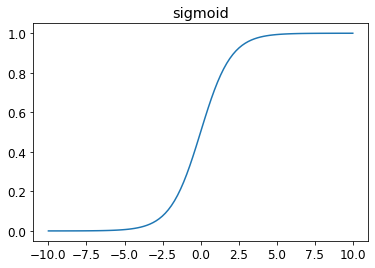

In [ ]:
from fastbook import *
plot_function(torch.sigmoid, title='sigmoid', min=-10,max=10)

To use it, simply slap it on the back of a tensor:

In [ ]:
tensor(-5.,-1,0,2,3).sigmoid()

tensor([0.0067, 0.2689, 0.5000, 0.8808, 0.9526])

Here's my **rormoid,** a sigmoid with a bigger "active linear range". The idea is to look at the range of your activations pre-sigmoid, then to adjust the sigmoid to fit the range.

In [ ]:
def rormoid(t,pct,inpt): return 1/(1+torch.exp(t*torch.log(tensor(1./pct-1))/tensor(inpt)))

It looks exactly like a sigmoid with a wider linear input range:

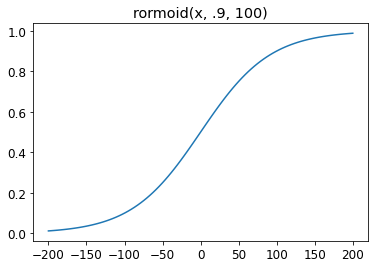

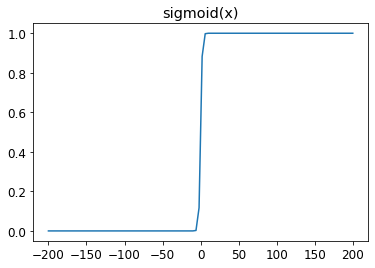

In [ ]:
test_pct, test_inpt = .9, 100
def rormoid_graph(x): return rormoid(x,test_pct,test_inpt)
plot_function(rormoid_graph, title='rormoid(x, .9, 100)', min=-test_inpt*2, max=test_inpt*2)
plot_function(torch.sigmoid, title='sigmoid(x)',          min=-test_inpt*2, max=test_inpt*2)

It's just a sigmoid with a "stretch" factor:

In [ ]:
def sigmoid(t):                      return 1/(1+torch.exp(-t))
def rormoid_refactored(t,stretch=1): return 1/(1+torch.exp(-t*stretch))

# Show that sigmoid(t) == rormoid(t,stretch=1)
test_t = tensor(.42)
test_eq(sigmoid(test_t),
        rormoid_refactored(test_t))

# Show that rormoid(t,n1,n2) == rormoid_refactored(t, get_stretch(n1,n2)
def get_stretch(pct, inpt): return -torch.log(tensor(1./pct-1))/tensor(inpt)
test_eq(rormoid(test_t, test_pct, test_inpt),
        rormoid_refactored(test_t, get_stretch(test_pct, test_inpt)))

These are our new sigmoid-including loss functions:

In [ ]:
def sig_loss(yp, y):
    yp = yp.sigmoid()
    return torch.where(y==1, 1-yp, yp).mean()

def ror_loss(yp, y):
    yp = rormoid(yp,20)
    return torch.where(y==1, 1-yp, yp).mean()

We ask for a batch of items with a **DataLoader.**

In [ ]:
coll = range(15)
dl = DataLoader(coll, batch_size=5, shuffle=True)
list(dl)

[tensor([ 3, 12,  8, 10,  2]),
 tensor([ 9,  4,  7, 14,  5]),
 tensor([ 1, 13,  0,  6, 11])]

DataLoader example with toy data. The point of this example is to look at the difference of what's in `ds` (tuples of x and y) vs what's in `list(dl)` (tuples of batched x's and y's).

In [ ]:
ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [ ]:
dl = DataLoader(ds, batch_size=7, shuffle=True)
list(dl) # Iterators can be listed (you see their iterations):

[(tensor([ 6, 14, 12, 15, 24, 11,  0]), ('g', 'o', 'm', 'p', 'y', 'l', 'a')),
 (tensor([16,  2, 18, 25, 21,  8,  7]), ('q', 'c', 's', 'z', 'v', 'i', 'h')),
 (tensor([19, 23,  1,  9,  4, 13, 10]), ('t', 'x', 'b', 'j', 'e', 'n', 'k')),
 (tensor([ 5,  3, 17, 22, 20]), ('f', 'd', 'r', 'w', 'u'))]

Iterators can be looped through:

In [ ]:
for x,y in dl:
    print(x,y)

tensor([ 4,  7, 14,  2,  5, 21, 19]) ('e', 'h', 'o', 'c', 'f', 'v', 't')
tensor([15, 25, 24, 18, 20, 11, 17]) ('p', 'z', 'y', 's', 'u', 'l', 'r')
tensor([22,  9, 23, 10,  3,  0, 12]) ('w', 'j', 'x', 'k', 'd', 'a', 'm')
tensor([ 8,  6, 16, 13,  1]) ('i', 'g', 'q', 'n', 'b')


# Putting it all together

One training **epoch** (an epoch is an entire run through a dataset) will look like this:

`for x,y in dl:
    yp = model(x)      # make prediction
    loss = loss(yp, y) # calculate loss
    loss.backward()    # calculate gradient
    p -= p.grad * lr   # update params`
    
So, we can loop that for however many epochs we have.

## Jumpstart
> `train_ims/lbls/ds`, `valid_ims/lbls/ds`, `weights`, `bias`, `wb`, `linear`, `yp`, `accuracy`, `ror_loss()`

In [ ]:
### Imports ###
from fastai.vision.all import *
from fastcore.test import *
from fastbook import plot_function


### Data ###
path = untar_data(URLs.MNIST_SAMPLE)
Path.BASE_PATH = path

train3 = torch.stack( # reshape list of 6000 tensor([28,28])s to a tensor([6000,28,28])
    [tensor(Image.open(o)) for o in (path/'train'/'3').ls()] # list of 6k tensor([28,28])s
    ).float()/255
train7 = torch.stack(
    [tensor(Image.open(o)) for o in (path/'train'/'7').ls()]
    ).float()/255

valid3 = torch.stack(
    [tensor(Image.open(o)) for o in (path/'valid'/'3').ls()]
    ).float()/255
valid7 = torch.stack(
    [tensor(Image.open(o)) for o in (path/'valid'/'7').ls()]
    ).float()/255

train_ims = torch.cat([train3,train7]).view(-1, 28*28)
train_lbls = tensor([1]*len(train3) + [0]*len(train7)).unsqueeze(1)
train_ds = list(zip(train_ims,train_lbls))

valid_ims = torch.cat([valid3,valid7]).view(-1, 28*28)
valid_lbls = tensor([1]*len(valid3) + [0]*len(valid7)).unsqueeze(1)
valid_ds = list(zip(valid_ims,valid_lbls))


### Initialize Params ###
def init_p(size, var=1.0):
    return (torch.randn(size)*var).requires_grad_()
weights,bias = init_p((28*28,1)), init_p(1)


### Initial Prediction ###
def linear(x): return x@weights+bias
yp = linear(train_ims)


### Loss Function ###
def rormoid(x,pctile=.95,top_activ=20):
    return 1/(1+torch.exp(-(-torch.log(tensor(1./pctile-1))/tensor(top_activ))*x))

def ror_loss(yp, y, pctile=.95,top_activ=20):
    p = rormoid(yp, pctile, top_activ)
    return torch.where(y==1, 1-p, p).mean()

def misdirected_confidence(yp, y):
    p = torch.sigmoid(yp)
    return torch.where(y==1, 1-p, 0+p).mean()

## Train SGD

Create **DataLoaders.**

In [ ]:
train_dl = DataLoader(train_ds, batch_size = 64*2*2*2, shuffle=True)
valid_dl = DataLoader(valid_ds, batch_size = 64*2*2*2, shuffle=True)
dls = DataLoaders(train_dl, valid_dl)

In [ ]:
# create iterators to give us mini-batches
train_dl = DataLoader(train_ds, batch_size = 64*2*2*2, shuffle=True)
valid_dl = DataLoader(valid_ds, batch_size = 64*2*2*2, shuffle=True)
dls = DataLoaders(train_dl, valid_dl)

### SGD ###
def train_epoch(dl, model, lr, params):
    for xb,yb in dl:
        calc_grad(xb,yb,model)
        for p in params:
            p.data -= p.grad*lr # Use p.data to avoid storing the grad in p.grad.
            p.grad.zero_()      ## We only want to store grad during calc_grad.

def calc_grad(x,y,model):
    yp = model(x)
    loss = sig_loss(yp,y)
    loss.backward()
    
def avg_batch_acc(yp,y): # Calcs accuracy of a mini-batch. Inputs are tensors. Everything is tensors!
    pred = torch.sigmoid(yp)
    correct = (pred>0.5) == y
    return correct.float().mean()

def validate_epoch(dl, model):
    acc = [get_accuracy(model(xb), yb) for xb,yb in dl]
    return round(torch.stack(acc).mean().item(), 3)

# setup
lr = 1.
epochs = 20
weights = init_p((28*28,1))
bias = init_p(1)
params = (weights, bias)

# train
for i in range(epochs):
    train_epoch(dl, linear, lr, params)
    print(validate_epoch(dl, linear), end='\n')
    

    
### Refactoring SGD ###
# class for handling SGD
class BasicOptim:
    def __init__(self, p, lr): self.p,self.lr = list(p),lr
        
    def step(self, *args, **kwargs):
        for o in self.p: o.data -= o.grad.data * self.lr
            
    def zero_grad(self, *args, **kwargs):
        for o in self.p: o.grad = None
            
# refactor train_epoch to call opt
def train_epoch(dl, model, opt):
    for xb,yb in dl:
        calc_grad(xb, yb, model) # no change
        opt.step()               # changed
        opt.zero_grad()          # changed

# simple looper for train_epoch
def train_model(dl, model, opt, epochs):
    for i in range(epochs):
        train_epoch(dl, model, opt)
        print(f'{i}:',validate_epoch(dl, model), end='\n')
        
# refactored SGD training code:
mod = nn.Linear(28*28,1) # nn.Linear() combines init_p() and linear()
opt = BasicOptim(mod.parameters(), lr)
train_model(dl, mod, opt, 20)

Datasets vs dataloaders:
- A `Dataset` is an `L` of tuples. Each tuple is an (x, y).
    - It can be indexed into: `ds[0]` → `(x0, y0)`.
    - Each x and y is a tensor: `x0.shape` → `[z]`

- A `DataLoader` is an iterator of batched tuples.
    - It can be iterated on with `for`
    - It can be turned into a list: `list(dl)[0]` → `(xb0, yb0)`
    - xb is a stack of #batch_size x's `xb0.shape` → `[bs, z]`

Define function for training one epoch given a mini-batch from a dataloader.

In [ ]:
def train_epoch(dl, model, lr, params):
    for xb,yb in dl:
        calc_grad(xb,yb,model)
        for p in params:
            p.data -= p.grad*lr # Use p.data to avoid storing the grad in p.grad.
            p.grad.zero_()      ## We only want to store grad during calc_grad.

def calc_grad(x,y,model):
    yp = model(x)
    loss = sig_loss(yp,y)
    loss.backward()

Define the accuracy of a batch of predictions given their labels.
- Final activations (aka outputs aka yp) have the range (0, 1), ∴ :
- yp > .5 → 1
- yp ≤ .5 → 0
- A prediction is correct if yp == y
- Accuracy = # correct / # y

In [ ]:
def avg_batch_acc(yp,y): # Calcs accuracy of a mini-batch. Inputs are tensors. Everything is tensors!
    pred = torch.sigmoid(yp)
    correct = (pred>0.5) == y
    return correct.float().mean()

Calculate predictions & accuracy for each mini-batch and return average of all mini-batch accuracies.

In [ ]:
def validate_epoch(dl, model):
    acc = [get_accuracy(model(xb), yb) for xb,yb in dl]
    return round(torch.stack(acc).mean().item(), 3)

Initialize and loop.

In [ ]:
dl = train_dl
lr = 1.
epochs = 20
weights = init_p((28*28,1))
bias = init_p(1)
params = (weights, bias)

for i in range(epochs):
    train_epoch(dl, linear, lr, params)
    print(validate_epoch(dl, linear), end='\n')

0.911
0.937
0.947
0.954
0.957
0.961
0.962
0.964
0.967
0.968
0.97
0.971
0.973
0.973
0.974
0.974
0.975
0.975
0.976
0.977


# Some Refactoring with PyTorch

Good news! We can create an object of `torch.nn.Linear`. `nn.Linear` inherits from `nn.Module`). It does lots of stuff. Ex:

`mod = nn.Linear(28*28,1)`

- Creates weights (size 28*28) and bias (size 1)
- Random value init
- sets `.requires_grad_()`
- When called as a fxn, does y=wb+b

In [ ]:
mod = nn.Linear(28*28,1)
w,b = mod.parameters()
w.shape,b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [ ]:
# Recreating nn.Linear is a recommended exercise.
class ror_linear: pass

We will now define an optimizer that receives the params from the linear model and updates them.

In [ ]:
class BasicOptim:
    def __init__(self, p, lr): self.p,self.lr = list(p),lr
        
    def step(self, *args, **kwargs):
        for o in self.p: o.data -= o.grad.data * self.lr
            
    def zero_grad(self, *args, **kwargs):
        for o in self.p: o.grad = None

Instantiate the optimizer:

In [ ]:
opt = BasicOptim(mod.parameters(), lr)

This is the simplified training loop:

In [ ]:
mod = nn.Linear(28*28,1)
opt = BasicOptim(mod.parameters(), lr)

In [ ]:
def train_epoch(dl, model):
    for xb,yb in dl:
        calc_grad(xb, yb, model) # no change
        opt.step()
        opt.zero_grad()

Validate doesn't change.

In [ ]:
validate_epoch(train_dl, mod)

0.62

Together:

In [ ]:
def train_model(dl, model, epochs):
    for i in range(epochs):
        train_epoch(dl, model)
        print(f'{i}:',validate_epoch(dl, model), end='\n')

In [ ]:
dl = train_dl
mod = nn.Linear(28*28,1)
opt = BasicOptim(mod.parameters(), lr) # train_model calls train_epoch calls opt
train_model(dl, mod, 20)

0: 0.977
1: 0.979
2: 0.981
3: 0.981
4: 0.982
5: 0.983
6: 0.983
7: 0.983
8: 0.984
9: 0.985
10: 0.984
11: 0.984
12: 0.985
13: 0.985
14: 0.986
15: 0.985
16: 0.986
17: 0.986
18: 0.986
19: 0.986


Hey silly, PyTorch comes with the optimizer! It's called `SGD`.

In [ ]:
dl = train_dl
mod = nn.Linear(28*28,1)
opt = SGD(mod.parameters(), lr)
train_model(dl, mod, 20)

0: 0.977
1: 0.98
2: 0.981
3: 0.981
4: 0.982
5: 0.982
6: 0.983
7: 0.984
8: 0.984
9: 0.985
10: 0.985
11: 0.985
12: 0.985
13: 0.985
14: 0.986
15: 0.985
16: 0.985
17: 0.986
18: 0.986
19: 0.986


More refactoring: fastai's `Learner.fit` can be used instead of `train_model`. Learner.fit requires a DataLoader to operate. DataLoader is a tiny class, but it's useful because it keeps track of anything that needs to be different between your train and valid (like transformations).

In [ ]:
dls = DataLoaders(train_dl, valid_dl)

In [ ]:
lr = 1.
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD,
                loss_func=sigmoidal_binary_classifier,
                metrics=avg_batch_acc)

In [ ]:
learn.fit(10,1.)

epoch,train_loss,valid_loss,avg_batch_acc,time
0,0.082303,0.048695,0.970559,00:00
1,0.057185,0.040425,0.972031,00:00
2,0.045535,0.036559,0.974975,00:00
3,0.039118,0.034096,0.975466,00:00
4,0.034796,0.033185,0.974485,00:00
5,0.032113,0.030998,0.977429,00:00
6,0.029642,0.030110,0.977920,00:00
7,0.027956,0.029306,0.976448,00:00
8,0.026500,0.028508,0.978410,00:00
9,0.025309,0.027774,0.978901,00:00


# Adding a non-linearity; my first NN

In [ ]:
def simple_net(x): # for x in mini-batch (x,y)
    yp = x@w1 + b1
    yp = yp.max(tensor(0.0))
    yp = yp@w2 + b2
    return yp

In [ ]:
w1 = init_p((28*28,30))
b1 = init_p(30)
w2 = init_p((30,1))
b2 = init_p(1)

PyTorch has a built in function that calls a sequence of functions so we don't have to write messy "function composition". We used fxn comp in the simple_net above: linear(relu(linear(y))).

In [ ]:
net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

Try it out! Note that deeper models tend to have bumpier surfaces, so we need smaller learning rates.

epoch,train_loss,valid_loss,avg_batch_acc,time
0,0.428764,0.301284,0.963199,00:00
1,0.268815,0.103962,0.965653,00:00
2,0.173752,0.068160,0.968597,00:00
3,0.121733,0.055576,0.970559,00:00
4,0.090636,0.049176,0.970559,00:00
5,0.071418,0.045001,0.971541,00:00
6,0.058558,0.042300,0.971050,00:00
7,0.049845,0.040009,0.971541,00:00
8,0.043971,0.038305,0.971541,00:00
9,0.039750,0.036887,0.971541,00:00


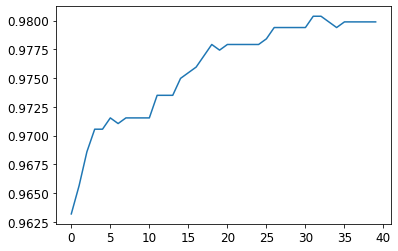

In [ ]:
net = nn.Sequential( # build net and initialize params at the same time
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1))

learn = Learner(dls,                             # dataloaders
                net,                             # model
                opt_func=SGD,                    # 
                loss_func=midirected_confidence, # loss fxn
                metrics=avg_batch_acc)           # judgement metric


learn.fit(40,0.1)

plt.plot(L(learn.recorder.values).itemgot(2)) #L.itemgot(n) gets nth row

### How Jeremy looks inside his models:

In [ ]:
# output model structure into m with learn.model
m = learn.model; m

Sequential(
  (0): Linear(in_features=784, out_features=30, bias=True)
  (1): ReLU()
  (2): Linear(in_features=30, out_features=1, bias=True)
)

In [ ]:
# destructure first linear layer's params into w,b:
w,b = m[0].parameters()
# view shape
w.shape # the model is discovering 30 parameters per img

torch.Size([30, 784])

In [ ]:
# reshape first parameter into 28*28
w[0].view(28,28)

tensor([[-0.0058, -0.0225, -0.0067, -0.0283,  0.0280, -0.0257,  0.0298,  0.0021,  0.0041, -0.0152,  0.0336, -0.0223,  0.0315,  0.0284, -0.0023, -0.0076, -0.0175,  0.0146, -0.0332,  0.0310, -0.0253,
          0.0191, -0.0348,  0.0128, -0.0316,  0.0031, -0.0241, -0.0316],
        [ 0.0022, -0.0059,  0.0299, -0.0044,  0.0242, -0.0074, -0.0033,  0.0011,  0.0313, -0.0128, -0.0070,  0.0022,  0.0345,  0.0157,  0.0072,  0.0236,  0.0306,  0.0173,  0.0224, -0.0194, -0.0206,
          0.0345, -0.0036, -0.0026, -0.0047,  0.0281, -0.0284, -0.0085],
        [ 0.0030,  0.0293,  0.0306,  0.0126,  0.0335, -0.0229,  0.0348,  0.0152, -0.0337, -0.0097,  0.0132, -0.0330,  0.0300,  0.0085, -0.0072, -0.0275,  0.0343, -0.0243, -0.0007,  0.0232, -0.0352,
         -0.0223, -0.0218,  0.0185,  0.0017,  0.0281,  0.0089, -0.0063],
        [ 0.0176,  0.0165,  0.0183,  0.0097, -0.0033,  0.0218, -0.0181, -0.0058, -0.0122, -0.0097, -0.0134,  0.0172, -0.0289,  0.0178, -0.0312, -0.0206, -0.0250,  0.0361,  0.0363, -0.0179

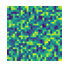

In [ ]:
# take a look inside
show_image(w[8].view(28,28))

In [ ]:
# Note that looking inside later layers takes more steps.

# Clean version of my work

## SGD by hand

In [ ]:
### Imports ###
from fastai.vision.all import *
from fastcore.test import *
from fastbook import plot_function


### Data ###
path = untar_data(URLs.MNIST_SAMPLE)
Path.BASE_PATH = path

# train
train3 = torch.stack( 
    [tensor(Image.open(o)) for o in (path/'train'/'3').ls()]         # Create list of 6131 28x28 im tensors, and
    ).float()/255                                                    ## stack them into one [6131,28,28] tensor.
train7 = torch.stack(
    [tensor(Image.open(o)) for o in (path/'train'/'7').ls()]         # Repeat for sevens.
    ).float()/255
train_ims = torch.cat([train3,train7]).view(-1, 28*28)               # Combine 3s a& 7s then reshape as [6131,786].
train_lbls = tensor([1]*len(train3) + [0]*len(train7)).unsqueeze(1)  # Create lbl tensors: 1 if im is 3 else 0.
train_ds = list(zip(train_ims,train_lbls))                           # Zip im,lbl to create dataset.
train_dl = DataLoader(train_ds, batch_size = 64*2*2*2, shuffle=True) # Create batches; create DataLoader (an iter).

# valid (not used until fastai.Learner)
valid3 = torch.stack(
    [tensor(Image.open(o)) for o in (path/'valid'/'3').ls()]
    ).float()/255
valid7 = torch.stack(
    [tensor(Image.open(o)) for o in (path/'valid'/'7').ls()]
    ).float()/255
valid_ims = torch.cat([valid3,valid7]).view(-1, 28*28)
valid_lbls = tensor([1]*len(valid3) + [0]*len(valid7)).unsqueeze(1)
valid_ds = list(zip(valid_ims,valid_lbls))
valid_dl = DataLoader(valid_ds, batch_size = 64*2*2*2, shuffle=True)


### Loss Function ###
def calibrated_confidence(yp, y, pctile=.95,top_activ=20):           # Loss function "Calibrated Confidence":
    pred = yp.sigmoid()                                              # - correct   & high confidence → low loss
    return torch.where(y==1, 1-pred, pred).mean()                    # - incorrect & high confidence → high loss


### Create Model & Initialize Params ###
three_layer_nn = nn.Sequential(                            # nn.Sequential() defines a model of composed fxns
    nn.Linear(28*28,30),                                   # nn.Linear.__init__(w,b) creates w,b with rand values
    nn.ReLU(),                                             # nn.Linear.__main__(t) returns t@w+b
    nn.Linear(30,1))                                       # nn.ReLU().__main__(t) returns t.max(tensor(0.))


### Create SGD Stepper ###
class ParamStepper:
    def __init__(self, p, lr): self.p,self.lr = list(p),lr # remembers your params & an lr
        
    def step(self, *args, **kwargs):                       # take one step in the optimal direction
        for o in self.p: o.data -= o.grad.data * self.lr
            
    def zero_grad(self, *args, **kwargs):                  # zeros out gradients
        for o in self.p: o.grad = None


### Calculate accuracy over one mini-batch given yp,y ###
def avg_batch_acc(yp,y):
#     sig_yp = rormoid(yp)
    sig_yp = yp.sigmoid()
    correct = (sig_yp > 0.5) == y
    return correct.float().mean()


### Calculate accuracy over entire dl given dl,mod ###
def validate_epoch(dl, mod):                               # Given data `dl` and a model & params `mod`
    acc = [avg_batch_acc(mod(xb), yb) for xb,yb in dl]     # Gradients calculated & stored at mod(xb) call
    return round(torch.stack(acc).mean().item(), 5)        # Avg over all mini-batches, return scalar (not tensor)


### Adjust parameters w/ stepper for each mini-batch in a dl
def train_once(dl, mod, stepper):
    for xb,yb in dl:
        calc_grad(xb, yb, mod)
        stepper.step()
        stepper.zero_grad()


### Run `train_once` `n` times given data `dl`, model `mod`, and stepper `stepper`
def train_model(dl, mod, stepper, n):
    for i in range(n):
        train_once(dl, mod, stepper)
        print(validate_epoch(dl, mod), end='\t')

# together
sgd = ParamStepper(three_layer_nn.parameters(), lr=1.)
train_model(train_dl, three_layer_nn, sgd, 20)

0.95731	0.97045	0.97418	0.97613	0.97686	0.9776	0.97881	0.9807	0.98125	0.98113	0.98137	0.98147	0.9826	0.98262	0.9827	0.9833	0.98354	0.98361	0.98414	0.98416	

## SGD with fastai.Learner

epoch,train_loss,valid_loss,avg_batch_acc,time
0,0.373491,0.221342,0.956330,00:00
1,0.225392,0.090568,0.964671,00:00
2,0.148503,0.064428,0.967125,00:00
3,0.106689,0.054224,0.968106,00:00
4,0.081910,0.048134,0.970559,00:00
5,0.065827,0.044419,0.971050,00:00
6,0.054908,0.041735,0.971050,00:00
7,0.047837,0.039702,0.971050,00:00
8,0.042872,0.038249,0.970559,00:00
9,0.038940,0.036653,0.972031,00:00


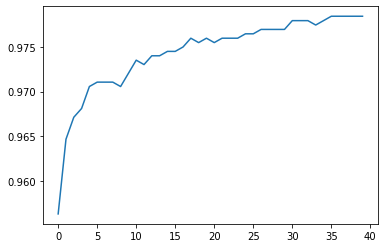

In [ ]:
### Imports ###
from fastai.vision.all import *
from fastcore.test import *


### Data ###
path = untar_data(URLs.MNIST_SAMPLE)
Path.BASE_PATH = path

# train
train3 = torch.stack( 
    [tensor(Image.open(o)) for o in (path/'train'/'3').ls()]         # Create list of 6131 28x28 im tensors, and
    ).float()/255                                                    ## stack them into one [6131,28,28] tensor.
train7 = torch.stack(
    [tensor(Image.open(o)) for o in (path/'train'/'7').ls()]         # Repeat for sevens.
    ).float()/255
train_ims = torch.cat([train3,train7]).view(-1, 28*28)               # Combine 3s a& 7s then reshape as [6131,786].
train_lbls = tensor([1]*len(train3) + [0]*len(train7)).unsqueeze(1)  # Create lbl tensors: 1 if im is 3 else 0.
train_ds = list(zip(train_ims,train_lbls))                           # Zip im,lbl to create dataset.
train_dl = DataLoader(train_ds, batch_size = 64*2*2*2, shuffle=True) # Create batches; create DataLoader (an iter).

# valid
valid3 = torch.stack(
    [tensor(Image.open(o)) for o in (path/'valid'/'3').ls()]
    ).float()/255
valid7 = torch.stack(
    [tensor(Image.open(o)) for o in (path/'valid'/'7').ls()]
    ).float()/255
valid_ims = torch.cat([valid3,valid7]).view(-1, 28*28)
valid_lbls = tensor([1]*len(valid3) + [0]*len(valid7)).unsqueeze(1)
valid_ds = list(zip(valid_ims,valid_lbls))
valid_dl = DataLoader(valid_ds, batch_size = 64*2*2*2, shuffle=True)

dls = DataLoaders(train_dl, valid_dl)


### Mini-batch Average Accuracy given yp,y ###
def avg_batch_acc(yp,y):
    sig_yp = yp.sigmoid()
    correct = (sig_yp > 0.5) == y
    return correct.float().mean()


### Loss Function "Calibrated Confidence" ###
def loss(yp, y):                                  # I like to call this "Calibrated Confidence":
    pred = yp.sigmoid()                           # - correct   & high confidence → low loss
    return torch.where(y==1, 1-pred, pred).mean() # - incorrect & high confidence → high loss


## Model ###
three_layer_nn = nn.Sequential( # nn.Sequential composes fxns. Each fxn is a layer, ∴ this is a 3 layer nn.
    nn.Linear(28*28,30),        # nn.Linear creates linear parameters W and B as in Y = X@W+B.
    nn.ReLU(),                  # nn.Linear is a class. When called, it's __main__(x) function computes X@W+B.
    nn.Linear(30,1))            # nn.ReLU is the same as item-wise max(t, 0), which replaces all negs with 0s.


### Combine data, model, stepper, loss, accuracy in a Learner ###
learn = Learner(dls,                   # train and valid dls
                three_layer_nn,        # model
                opt_func=SGD,          # fastai.SGD optimizer
                loss_func=loss,        # loss fxn
                metrics=avg_batch_acc) # judgement metric

### Train ###
epochs = 40
lr = 0.1
learn.fit(epochs,lr)
plt.plot(L(learn.recorder.values).itemgot(2)) # L.itemgot(2) returns every 2nd row

### How Jeremy looks inside his models:

In [ ]:
# output model structure into m with learn.model
m = learn.model; m

Sequential(
  (0): Linear(in_features=784, out_features=30, bias=True)
  (1): ReLU()
  (2): Linear(in_features=30, out_features=1, bias=True)
)

In [ ]:
# destructure first linear layer's params into w,b:
w,b = m[0].parameters()
# view shape
w.shape # the model is discovering 30 parameters per img

torch.Size([30, 784])

In [ ]:
# reshape first parameter into 28*28
w[0].view(28,28)

tensor([[-0.0058, -0.0225, -0.0067, -0.0283,  0.0280, -0.0257,  0.0298,  0.0021,  0.0041, -0.0152,  0.0336, -0.0223,  0.0315,  0.0284, -0.0023, -0.0076, -0.0175,  0.0146, -0.0332,  0.0310, -0.0253,
          0.0191, -0.0348,  0.0128, -0.0316,  0.0031, -0.0241, -0.0316],
        [ 0.0022, -0.0059,  0.0299, -0.0044,  0.0242, -0.0074, -0.0033,  0.0011,  0.0313, -0.0128, -0.0070,  0.0022,  0.0345,  0.0157,  0.0072,  0.0236,  0.0306,  0.0173,  0.0224, -0.0194, -0.0206,
          0.0345, -0.0036, -0.0026, -0.0047,  0.0281, -0.0284, -0.0085],
        [ 0.0030,  0.0293,  0.0306,  0.0126,  0.0335, -0.0229,  0.0348,  0.0152, -0.0337, -0.0097,  0.0132, -0.0330,  0.0300,  0.0085, -0.0072, -0.0275,  0.0343, -0.0243, -0.0007,  0.0232, -0.0352,
         -0.0223, -0.0218,  0.0185,  0.0017,  0.0281,  0.0089, -0.0063],
        [ 0.0176,  0.0165,  0.0183,  0.0097, -0.0033,  0.0218, -0.0181, -0.0058, -0.0122, -0.0097, -0.0134,  0.0172, -0.0289,  0.0178, -0.0312, -0.0206, -0.0250,  0.0361,  0.0363, -0.0179

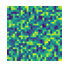

In [ ]:
# take a look inside
show_image(w[8].view(28,28))

In [ ]:
# Note that looking inside later layers takes more steps.

# Everything in three lines and one epoch

In [ ]:
from fastai.vision.all import *

path = untar_data(URLs.MNIST_SAMPLE)
Path.BASE_PATH = path

dls = ImageDataLoaders.from_folder(path)
learn = cnn_learner(dls, resnet18, pretrained=False, loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.097050,0.007030,0.998037,00:04


# Next: improvements

- Add RGB
- Change from binary classifier to multi category classifier:
    - add ims 0-9
    - add change loss fxn to cross entropy loss w/ softmax
    - change shape of final activation from 1 to 10
    - change label to 1HE